In [1]:

import matplotlib.pyplot as plt 
import cv2 
import numpy as np 
from PIL import Image
# Read the image 
img = cv2.imread("./images/Lenna_(test_image).png",0)


# Histogram Distribution Curve

In [2]:
# FUnction to compute gray level histogram 
def histogram_Compute(image):
    img_height = image.shape[0]
    img_width = image.shape[1]
    hist = np.zeros([256],np.int32)
    for x in range(0,img_height):
        for y in range(0,img_width):
            hist[image[x,y]] +=1
    np.savetxt("./saved_text/gray scale histogram.txt",hist)
    return hist

In [3]:
# plotting the gray scale histogram 
def histogram_Plot(histogram):
    plt.figure()
    plt.title("Histogram Distribution Curve")
    plt.xlabel("Brightness")
    plt.ylabel("number of Pixels")
    plt.xlim([0,256]) # As gray scale levels vary from 0 -> 256
    plt.plot(histogram)
    plt.savefig("./saved_imgs/hisogram.jpg")

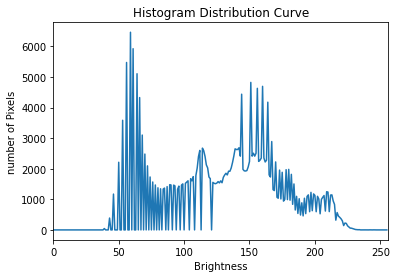

In [4]:
Gray_Scaled_histogram = histogram_Compute(img)
histogram_Plot(Gray_Scaled_histogram)

# Image Normalization

In [5]:
# function to normalize the image
def img_normalization(img):
    Min = np.min(img)
    Max = np.max(img)
    return (((img- Min)/((Max-Min)))) #stretching histogram equation from 0->255 to 0.0 -> 1.0

In [6]:
norm = img_normalization(img) #applying normalization
# visualize the normalized image
cv2.imshow('Normalized Image', norm) 
cv2.waitKey(0)
cv2.destroyAllWindows()
#showing outputs
print("Image data Before Normalize:\n",img )
print("Maximum img intensity:",img.max() ,"Minimum img intensity:",img.min())
print("Image data after Normalize:\n", norm)
print("Maximum Normalized intensity:",norm.max() ,"Minimum Normalized intensity:",norm.min())
#saving output
norm *=255.0 #image with range 0-> 1 will be saved as black due to very low intensity thus ,convert it to 0-> 256 to save it 
cv2.imwrite('./saved_imgs/norm.jpg',norm)

Image data Before Normalize:
 [[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]
Maximum img intensity: 245 Minimum img intensity: 39
Image data after Normalize:
 [[0.63106796 0.63106796 0.62621359 ... 0.66019417 0.59708738 0.48058252]
 [0.63106796 0.63106796 0.62621359 ... 0.66019417 0.59708738 0.48058252]
 [0.63106796 0.63106796 0.62621359 ... 0.66019417 0.59708738 0.48058252]
 ...
 [0.06796117 0.06796117 0.09708738 ... 0.36893204 0.35436893 0.36407767]
 [0.06796117 0.06796117 0.12135922 ... 0.37864078 0.38349515 0.40291262]
 [0.06796117 0.06796117 0.12135922 ... 0.37864078 0.38349515 0.40291262]]
Maximum Normalized intensity: 1.0 Minimum Normalized intensity: 0.0


True

In [7]:
######### using cv2  to make sure the o/p is correct in the above cell ~_~
norm_cv= cv2.normalize(img, None, 0, 1.0,
cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# visualize the normalized image
cv2.imshow('Normalized Image cv', norm_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("Image data after Normalize:\n", norm_cv)

Image data after Normalize:
 [[0.631068   0.631068   0.6262136  ... 0.66019416 0.5970874  0.48058254]
 [0.631068   0.631068   0.6262136  ... 0.66019416 0.5970874  0.48058254]
 [0.631068   0.631068   0.6262136  ... 0.66019416 0.5970874  0.48058254]
 ...
 [0.06796117 0.06796117 0.09708738 ... 0.36893204 0.35436893 0.3640777 ]
 [0.06796117 0.06796117 0.12135923 ... 0.37864077 0.38349515 0.40291262]
 [0.06796117 0.06796117 0.12135923 ... 0.37864077 0.38349515 0.40291262]]
